In [1]:
import matplotlib.pyplot as plt

# Abstract
Searches for new physics at the LHC often involve looking for excesses on top of falling backgrounds. Typical approaches model the background using polynomials or other parametric families. Polynomials are nice because they theoretically provide unbiased estimates of the background, however they can lead to undesirable behavior in the tails. Parametric families can be found which provide accurate estimates but are often ad-hoc and can lead to biased estimates. To address these biases one typically considers several parametric families at once to estimate the systematic uncertainty. In this work we motivate the use of the exponential mixture model to estimate long tailed distributions. The exponential mixture model is unique in representation and can approximate any completely monotonic function to arbitrary precision. We show that the model gives comparable performance to other methods in data and in toy studies that it is flexible enough to approximate many commonly used parametric families.

# Introduction

Outline:
- Intro
- Previous work
- Motivation
    - Less assumptions
- Summary of contributions
- Outline of paper

Searches for new physics often employ a statistical framework which consists of a signal and a background model. In most cases the standard model backgrounds are complicated enough that there is no analytic form for the background. In some cases the best thing to do is to use a non-parametric approach, deriving the background from Monte Carlo simulations of the standard model processes and detector response. In such cases it's not always clear that one is including all the relevant processes and validation of the method comes from cross-checks performed in data. In other cases people choose to use a parametric approach, modeling the background with some analytic function. The advantage of this approach is that it is often easier to implement as we do not need to worry about the details of the simulation, this is especially true when the background is not well understood. The disadvantage is that we need to choose a functional form and this choice can lead to biases which can be difficult to quantify. In this work we will focus on the case of a falling background, which is the most common case in high mass searches. We will show that the hyperexponential model is a good choice for modeling falling backgrounds and that it has several advantages over other methods.

One commonly used analytic form for the background is a polynomial. Polynomials are nice because of their theoretical properties which guarantee that they are unbiased estimates of the background. However, polynomials can lead to undesirable behavior in the tails where they can diverge to infinity after running out of data. Any deviation from a falling background could be evidence of new physics so it would be nice to have a model which incorporates some physics intuition. Other approaches involve using some parametric family of functions which are not necessarily unbiased but lack the undesirable flexibility of polynomials. The functions used are often ad-hoc and are derived from backgrounds specific to a given analysis. The bias is usually quantified by considering several parametric families at once, in a method known as discrete profiling or the envelope method.

# Background

Outline:
- Existing models/searches
    - Higgs search (polynomials)
    - High mass diphoton (...)
- Tail Behavior
- Uncertainty estimation

# Exponential Mixture Model

Outline:
- Mixture models
- Categorical Mixing distribution
- Bernstein's theorem
    - Statement
    - Completely monotone functions
        - Definition
        - Characterization
- Exponential Mixture
- Reparameterization for identifiability
- Constraining tail probabilities for uncertainty estimation

Mixture models are effective tools for modeling mixed effects and approximating more complicated distributions. A simple example is a weighted sum of two normal distributions which uses the normal distribution as the base density function and a categorical distribution (with two categories) as the mixing distribution for the normal means. More generally for some base density function $p(x | \theta)$ and a continuous mixing distribution with density $p(\theta)$ for $\theta \in [0, \infty)$, this is written as:
$$
f(x) = \int_0^\infty p(\theta) p(x | \theta) d\theta \, .
$$ {#eq-mixture-density}
The mixing distribution can be complicated but for simplicity we will assume that it is a categorical distribution with $k$ categories. In this case the mixture density reduces to:
$$
f(x) = \sum_{i=1}^k w_i p(x | \theta_i) \, ,
$$ {#eq-finite-mixture-density}
where $w_i$ are the relative probabilities of each category and $\theta_i$ are the base density parameters associated with each category. Intuitively, one can think of the finite mixture assumption as a non-parametric approximation of some more complicated continuous mixture density. In practice the number of categories $k$ is chosen based on the data and the desired level of complexity.

In many cases one might expect the density in question to be monotonically decreasing. One class of functions which is particularly useful in this case is the class of completely monotone functions. These functions are characterized by the following relation:
\begin{equation}
(-1)^n\frac{d^n}{dx^n} f(x) \geq 0 \, ,
\end{equation}
for all $x > 0$. Some examples of completely monotone functions are:
\begin{equation}
f(x) = \begin{cases}
c & \text{for } c \geq 0 \\
e^{-ax} & \text{for } a \geq 0 \\
\frac{1}{(\lambda + \mu x)^\nu} & \text{for } \lambda, \mu, \nu \geq 0 \\
\log(b+\frac{c}{x}) & \text{for } b \geq 1, c >0 \\
af(x) + bg(x) & \text{for } a, b \geq 0 \text{ and } f, g \in \mathcal{CM} \\
f(x)g(x) & \text{for } f, g \in \mathcal{CM} \\
f(g(x)) & \text{for } f, g \in \mathcal{CM} \\
\sum_{k=1}^\infty a_k f(x)^k & \text{for } a_k \geq 0 \text{ and } f \in \mathcal{CM} \\
e^{f(x)} & \text{for } f \in \mathcal{CM} \\
\end{cases}
\end{equation}
where $\mathcal{CM}$ is the class of completely monotone functions \cite{miller}.

A useful theorem in this context is Bernstein's theorem on monotone functions. This theorem states that every completely monotone function on $(0, \infty)$ is the Laplace transform of a unique measure $\mu$ on $[0, \infty)$, i.e.:
\begin{equation}
f(\lambda) = \int_0^\infty e^{-\lambda t} \mu(dt) \, ,
\end{equation}
where $\lambda > 0$ \cite{bernstein}. A corollary of this theorem is that every completely monotone function is a mixture of exponential functions.

Exponential mixture models are used across a wide range of applications, including survival analysis, reliability engineering, queuing theory, and density estimation to name a few. 

The exponential mixture model is given by
$$
f(x) = \sum_{i=1}^k w_i e^{-r_i x}
$$
where $\sum_{i=1}^k w_i = 1, w_i \geq 0$ and $r_i > 0$. The hyperparameter $k$ controls the number of mixture components.

If the background pdf $f$ is completely monotonic i.e.
$$
\frac{d^n}{dx^n} f(x) \geq 0
$$
for all $n$ and $x$, then by Bernstein's theorem $f$ is a (possibly infinite) mixture of exponentials [??]. This model will not fit non-monotonic behavior so overfitting is of little concern for a resonant search. In practice $k$ cannot be arbitrarily large as we run into computational issues reltated to the identifiability of the parameters (see section \ref{inference}).

There is one larger issue of identifiability though: every term in this pdf is equal in terms of flexibility. This means that $r_i$ and $r_j$ may be used to describe the same effect in the data. This leads to flat ridges and valleys in the likelihood function which is not necessarily an issue for prediction itself but can cause problems for uncertainty estimation. 

To overcome this obstacle we decide to reparametrerize the rate parameters $r_i$ to be ordered. To do this we redefine $r_i$ to be:
$$
r_i = \sum_{j=1}^i \alpha_j \, ,
$$
where $\alpha_j \in \mathbb{R}^+$.

% Counter argument

As the rate difference $\alpha_j$ goes to zero we encounter the same issue right? Is there any benefit to this parameterization then? So what exactly is the issue in the first place? If the rate parameters are the same (or close enough) then the probabilities (mixture weights) will be linearly dependent. For the most part I'd say this suggests over-parameterization - if the parameters are the same it means that there are no residuals which are improved by having an additional parameter. Is a bounded parameter less likely to go to zero - probably so for Minuit because it uses some transformation which has trouble with parameters on the boundaries - I think the unbound parameter needs to go to infinity to reach the boundary. But the rate difference doesn't need to be zero for them to be close enough to describe the same effect - there is uncertainty in all the parameters anyway. I wonder, is this ordered parameterization less likely to get stuck in this $r_i\approx r_j$ mode.

In this paradigm we would need some penalty to keep $\alpha_j$ from going to zero - that or some lower bound. Intuitively I prefer the penalty approach but both are subjective. I could multiply my pdf by $\prod e^{-b/\alpha_j}$, but then what choice of $b$ is appropriate? It should probably depend on the scale of the rate parameters.

# Inference

Outline:
- ROOT
    - Minuit
    - HESEE/MINOS
- AIC/BIC
- Profile Likelihood?
- Goodness of fit
- Correlated parameters

# Simulation Studies

Outline:
- Metrics for success
    - Goodness of fit
    - Bias (Error)
    - Coverage
- Dataset size dependence
- Tail probability parameter

To study the performance of the hyperexponential model on the particular background functions used in CMS we generate a number of toys from a particular function and asses the bias and coverage as functions of $x$. The bias and coverage are measured with respect to the generating pdf.

In [ ]:
# Get and plot the AIC/BIC for the toy data
# toy_aic_bic_df = get_AIC_BIC_loo(t=toy_data, tag="toy_data")
# plot_AIC_BIC_loo(df=toy_aic_bic_df,)

In [ ]:
# Generate toy data
n_toy_events = data.numEntries()

toy_model = exppow_model
# toy_model = dijet_model

toy_pdf = toy_model.pdf

toy_data = ROOT.RooDataSet(
    "toy_data", "toy_data",
    ROOT.RooArgSet(x),
    ROOT.RooFit.Import(
        toy_pdf.generate(ROOT.RooArgSet(x), n_toy_events)
    )
)

# Fit the toy data with the Exponential Mixture Model
emm_toy = bkg.ExponentialMixtureModel(x, 3)
emm_toy_fit_result = emm_toy.pdf.fitTo(toy_data, ROOT.RooFit.Save())

# Plot the toy data and the fit
bkg.plot_fits(
    toy_data, x, bins,
    [emm_toy, dijet_model],
    ["Exponential Mixture (Toy Fit)", toy_model.name],
    [emm_toy_fit_result, None],
)

In [ ]:
# Submit jobs scanning the space of n_exp and n_events per toy
# TODO: Verify that this is correct. For some reason the shape of the bias seems too consistent across toys.
import os
from analysis.tools.storage_config import scripts_dir
from analysis.tools import condor

script = f"{scripts_dir}/bkg_study_get_bias_inputs.py"

# toy_model_name = "Dijet"
toy_model_name = "ExpPow"

n_toys = 1000
n_exps = [2,3,4,5,6]
n_events_per_toy_list = [5000, 10000, 20000, 50000]

condor_tasks = []
for n_exp in n_exps:
    for n_events_per_toy in n_events_per_toy_list:
        task = condor.Task(bkg.get_bias_inputs, (toy_model_name, n_toys, n_events_per_toy, n_exp), {})
        condor_tasks.append(task)
condor.submit_tasks("bkg_study_get_bias_inputs", condor_tasks)


I'm not doing this right I think. For one the errors on the fit prediction may be asymmetric but this is not accounted for in what I'm doing here.

In [ ]:
# Plot the bias results

df = bkg.get_bias_info(toy_model.name, n_toys, n_events_per_toy_list, n_exps)
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue
        axs[i].step(
            bins, __df['pull_mean'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("(fit-true)/fit_error")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    
    # Draw horizontal line at zero for reference
    axs[i].axhline(0, color='gray', linestyle='--', linewidth=1)

axs[-1].set_xlabel("Diphoton Mass [GeV]")

In [ ]:
# Plot the coverage percentage
bins = np.linspace(500, 4000, 100)

fig, axs = plt.subplots(
    len(n_events_per_toy_list), 1,
    figsize=(10, 6 * len(n_events_per_toy_list)),
    sharex=True,)

for i, n_events_per_toy in enumerate(n_events_per_toy_list):
    _df = df[df['n_events_per_toy'] == n_events_per_toy]

    for n_exp in n_exps:
        __df = _df[_df['n_exp'] == n_exp]
        if __df.empty:
            print(f"No data for n_exp={n_exp} with n_events_per_toy={n_events_per_toy}. Skipping.")
            continue

        axs[i].step(
            bins, __df['covered_percentage'].values[0],
            where='post',
            label=f'n_exp={n_exp}',
            linewidth=2,
        )

    axs[i].set_ylabel("Coverage Percentage (%)")
    axs[i].set_title(f"{n_toys} Toys, {n_events_per_toy} Events per Toy")
    axs[i].legend(loc='upper right', fontsize='small')
    axs[i].set_ylim(99, 101)  # Set y-limits to ensure visibility of the 95% line

    # Draw horizontal line at 95% for reference
    axs[i].axhline(95, color='gray', linestyle='--', linewidth=1)
axs[-1].set_xlabel("Diphoton Mass [GeV]")

# Diphoton Mass Spectrum

Outline:
- Model comparsion in data
- Goodness of fit

In [4]:
import ROOT
import emm

Top directory: /home/atownse2/Projects


In [5]:
# Get data
data_tree = emm.get_data()
bins = emm.get_fine_binning()

x = ROOT.RooRealVar("x", "Diphoton Mass [GeV]", 500, 4000)
data = ROOT.RooDataSet("data", "data", ROOT.RooArgSet(x), ROOT.RooFit.Import(data_tree))

Loaded 5036 diphoton invariant masses from data.


In [6]:
def fit_and_plot(model, data, x, fit_result=None):
    if fit_result is None:
        fit_result = model.pdf.fitTo(
            data,
            ROOT.RooFit.Save(),
            # ROOT.RooFit.Strategy(2)
        )

    emm.plot_fits(
        data, x,
        [model],
        [model.name],
        [fit_result, None, None],
        logx=True,
        nbins=128,
    )
    emm.plot_correlation_matrix(fit_result)

    # print("nll:", nll.getVal())
    for var_name, var in model.fitted.items():
        print(f"{var_name}: {var.getVal()} ± {var.getError() if hasattr(var, 'getError') else 'N/A'}")


Rate scaling factor: -0.00565722090722949


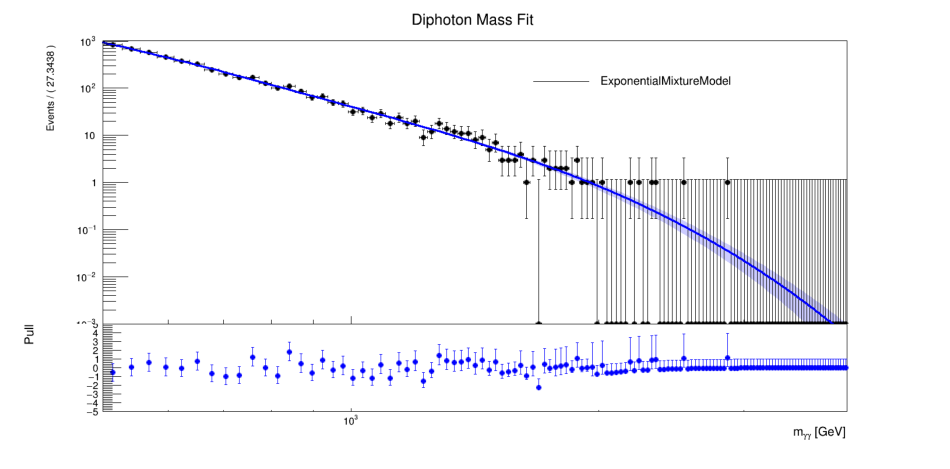

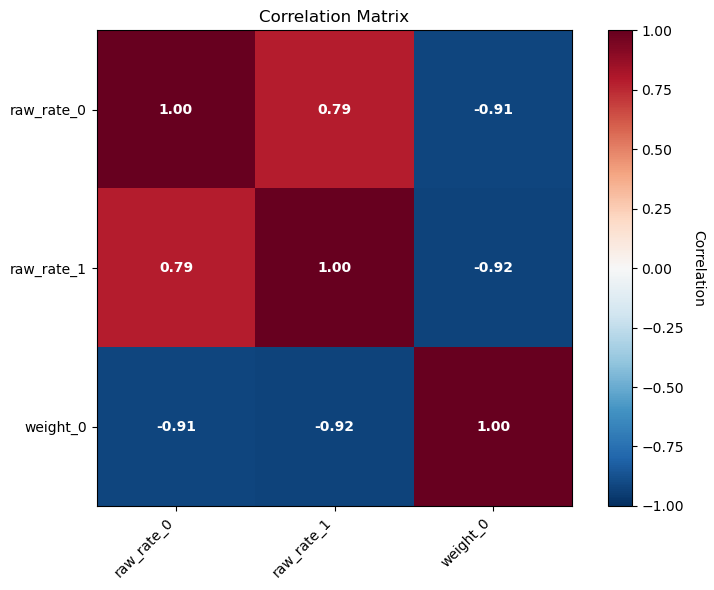

weight_0: 0.6129687048444201 ± 0.0741725901535979
raw_rate_0: 1.5379749629182717 ± 0.1115850142243967
raw_rate_1: 0.643388811729065 ± 0.04666699684398301
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1)
Minuit2Minimizer: Minimize with max-calls 1500 convergence for edm < 1 strategy 2
Minuit2Minimizer : Valid minimum - status = 0
FVAL  = 31030.8265204024792
Edm   = 0.000434974375450491958
Nfcn  = 163
raw_rate_0	  = 1.53797	 +/-  0.113486	(limited)
raw_rate_1	  = 0.643389	 +/-  0.0466926	(limited)
weight_0	  = 0.612969	 +/-  0.0748666	(limited)
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: deactivating const optimization


Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       32304.60586 Edm =       172.6121294 NCalls =     13
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 31128.23645
  Edm           : 172.4092835
  Internal parameters:	[     -1.495973719     -1.507540228                0]	
  Internal gradient  :	[      4556.582531      18328.75922       114.085563]	
  Internal covariance matrix:
[[  8.5659133e-06              0              0]
 [              0   1.140415e-06              0]
 [              0              0   0.0098861195]]]
Warning in <Minuit2>: MnPosDef Matrix forced pos-def by adding to diagonal 1.89418
Info in <Minuit2>: MnSeedGenerator run Hesse - Initial seeding state: 
  Minimum value : 31128.23645
  Edm           : 1262.005143
  Internal par

In [121]:
# Fit and plot
model = emm.ExponentialMixtureModel(x, 2, data.mean(x))
fit_and_plot(model, data, x)

Rate scaling factor: -0.00565722090722949


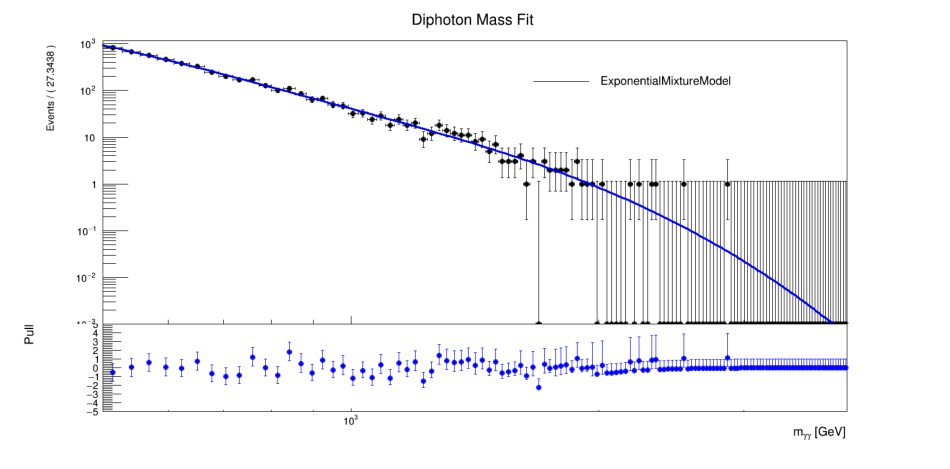

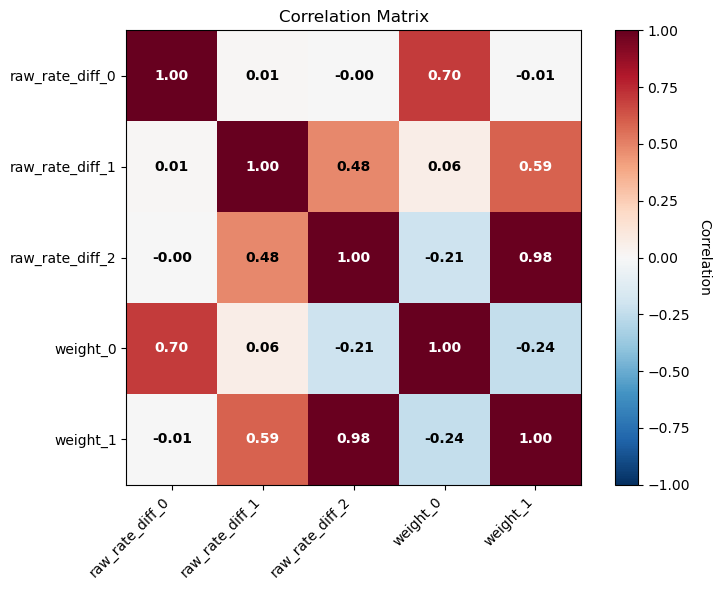

weight_0: 0.3850846668306564 ± 0.03373100962417247
weight_1: 0.4949391300842401 ± 0.6785636491078516
raw_rate_diff_0: 0.6425463365779371 ± 0.02255429185325769
raw_rate_diff_1: 0.8854471819295383 ± 0.09551773723810164
raw_rate_diff_2: 0.03990025635231321 ± 37.1419892716155
raw_rate_0: 0.6425463365779371 ± N/A
raw_rate_1: 1.5279935185074756 ± N/A
raw_rate_2: 1.5678937748597888 ± N/A
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1,exp_2)
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.24173
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.24173
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF co

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31548.41074 Edm =       2531.182178 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 31548.41074
  Edm           : 2531.182178
  Internal parameters:	[     -1.507857093     -1.507857093     -1.507857093    -0.3398369095    -0.3398369095]	
  Internal gradient  :	[      52903.91998        12636.808      3946.807677     -1079.555828     -262.8804881]	
  Internal covariance matrix:
[[  6.3432704e-07              0              0              0              0]
 [              0  1.3751726e-05              0              0              0]
 [              0              0  8.9816259e-05              0              0]
 [              0              0              0   0.0014029017              0]
 [              0              0              0              0    0.045137334]]]
Info in <Minuit2>: VariableMetricBuilde

In [15]:
# Fit and plot
model = emm.ExponentialMixtureModel_Ordered(x, 3, data.mean(x))
fit_and_plot(model, data, x)

Rate scaling factor: -0.00565722090722949


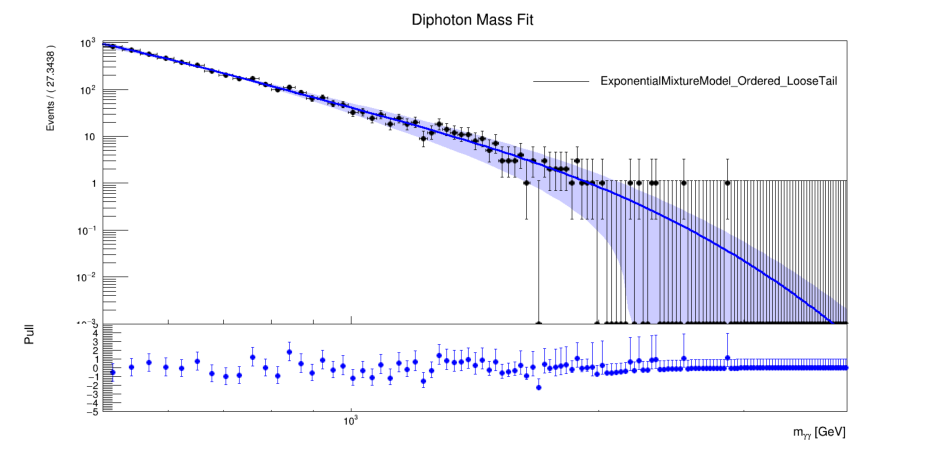

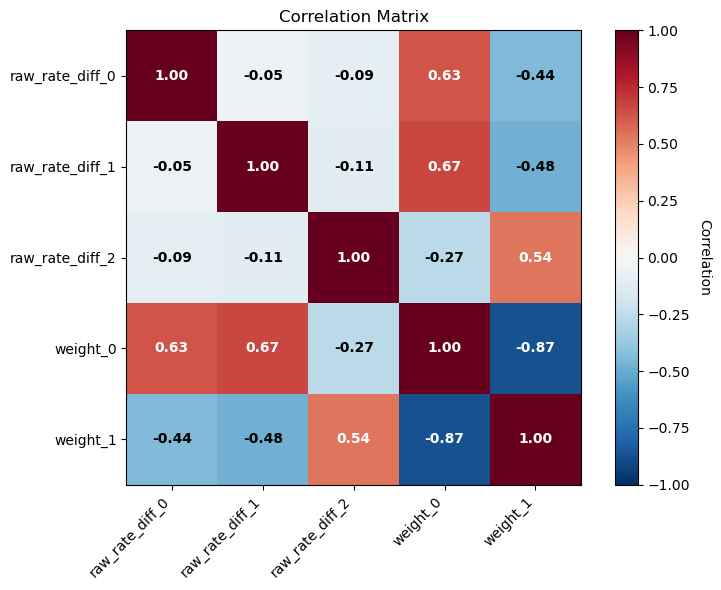

weight_0: 0.0016224880364665243 ± 0.0346953921886481
weight_1: 0.38212893302390083 ± 0.1149232631969869
raw_rate_diff_0: 0.5319071198247921 ± 0.07820565007417515
raw_rate_diff_1: 0.11064010931482428 ± 0.0828834830090483
raw_rate_diff_2: 0.8906207206222917 ± 0.07100228265877995
raw_rate_0: 0.5319071198247921 ± N/A
raw_rate_1: 0.6425472291396164 ± N/A
raw_rate_2: 1.533167949761908 ± N/A
[#1] INFO:Minimization -- RooAbsMinimizerFcn::setOptimizeConst: activating const optimization
[#1] INFO:Minimization --  The following expressions will be evaluated in cache-and-track mode: (exp_0,exp_1,exp_2)
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 2
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.04971
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.04971
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PD

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       33752.27782 Edm =       2529.128371 NCalls =     21
Info in <Minuit2>: NegativeG2LineSearch Doing a NegativeG2LineSearch since one of the G2 component is negative
Info in <Minuit2>: MnSeedGenerator Negative G2 found - new state: 
  Minimum value : 32140.43071
  Edm           : 2299.714997
  Internal parameters:	[     -1.507857093     -1.507857093     -1.571488452      1.435902147      1.038650812]	
  Internal gradient  :	[      71139.40594      43659.00338     -9.629043732     -18.64676487     -3.719502725]	
  Internal covariance matrix:
[[  7.4908095e-07              0              0              0              0]
 [              0  2.8322009e-06              0              0              0]
 [              0              0  0.00014378144              0              0]
 [              0              0              0    0.014484651          

In [20]:
# Fit and plot
model = emm.ExponentialMixtureModel_Ordered_LooseTail(x, 3, data.mean(x), tail_prob=(0.0001, 0, 0.05))
fit_and_plot(model, data, x)

Rate scaling factor: -0.00565722090722949
Regular nll: 31030.832112488675
Total NLL: 31031.43133463858


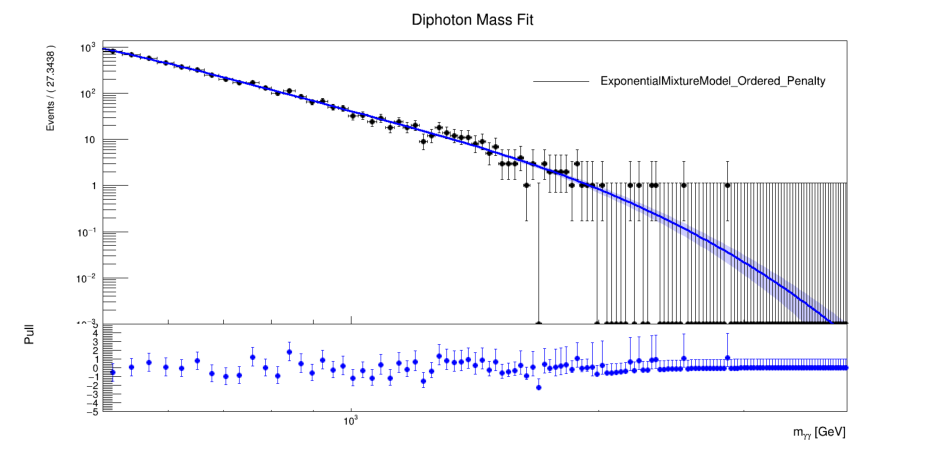

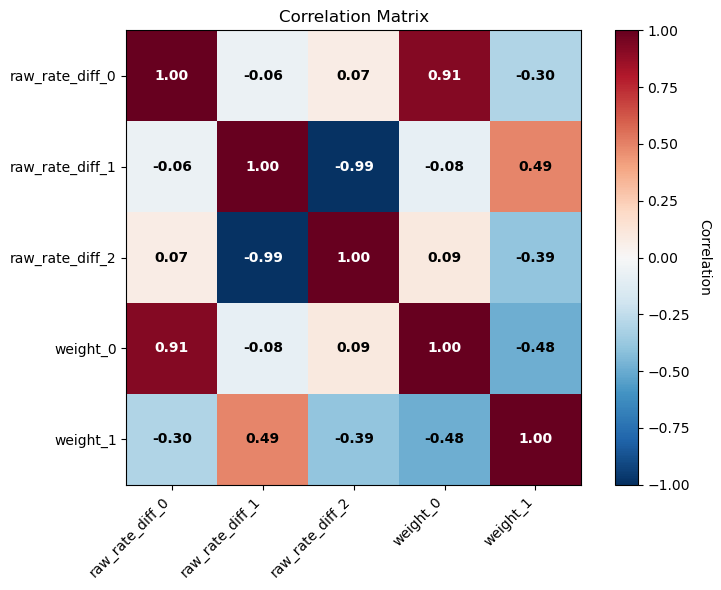

weight_0: 0.38534700411771927 ± 0.08484513981598404
weight_1: 0.012268889159274059 ± 0.8248558883838994
raw_rate_diff_0: 0.6427696432023714 ± 0.048960212611248055
raw_rate_diff_1: 0.46484804437681543 ± 0.8346919982877763
raw_rate_diff_2: 0.43759586365599135 ± 0.7971141903391645
raw_rate_0: 0.6427696432023714 ± N/A
raw_rate_1: 1.1076176875791868 ± N/A
raw_rate_2: 1.5452135512351781 ± N/A
[#1] INFO:Minimization -- RooFormulaVar::defaultErrorLevel(total_nll) Formula contains a RooNLLVar, using its error level
Minuit2Minimizer: Minimize with max-calls 2500 convergence for edm < 1 strategy 1
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.24195
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.24195
[#0] WARNING:Eval -- RooAddPdf::updateCoefCache(emm_pdf WARNING: sum of PDF coefficients not in range [0-1], value=1.24195
[#0] WARNING:Eval -- RooAddPdf::updat

Info in <Minuit2>: MnSeedGenerator Computing seed using NumericalGradient calculator
Info in <Minuit2>: MnSeedGenerator Initial state: FCN =       31548.71074 Edm =       2527.415988 NCalls =     21
Info in <Minuit2>: MnSeedGenerator Initial state  
  Minimum value : 31548.71074
  Edm           : 2527.415988
  Internal parameters:	[     -1.507857093     -1.507857093     -1.507857093    -0.3398369095    -0.3398369095]	
  Internal gradient  :	[      52900.77506      12633.66303      3943.662515     -1079.555828     -262.8804879]	
  Internal covariance matrix:
[[  6.3429729e-07              0              0              0              0]
 [              0  1.3737755e-05              0              0              0]
 [              0              0  8.9223516e-05              0              0]
 [              0              0              0   0.0014029017              0]
 [              0              0              0              0    0.045137334]]]
Info in <Minuit2>: VariableMetricBuilde

In [40]:
# Fit and plot
model = emm.ExponentialMixtureModel_Ordered_Penalty(x, 3, data.mean(x), penalty=0.1)

nll = model.pdf.createNLL(data)
total_nll = ROOT.RooFormulaVar(
    "total_nll", "Total NLL",
    "@0 + @1",  # Subtract the penalty from the NLL
    ROOT.RooArgList(nll, model.penalty)
)

minimizer = ROOT.RooMinimizer(total_nll)
minimizer.minimize("Minuit2", "migrad")
# minimizer.optimizeConst(True)       # optional: optimize constant terms
minimizer.hesse()
# minimizer.minos()  # optional: compute errors using Minos
fit_result = minimizer.save()
print("Regular nll:", nll.getVal())
print("Total NLL:", total_nll.getVal())
# emm_fit_result = emm_model.pdf.fitTo(data, ROOT.RooFit.Save())
fit_and_plot(model, data, x, fit_result=fit_result)

In [ ]:
# Plot the AIC/BIC
aic_bic_df = get_AIC_BIC_loo(t=data)
plot_AIC_BIC_loo(df=aic_bic_df,)

# Discussion

Outline:
- Questions
    - How hard do I have to work to overfit?

Actual discussion here